In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load diabetes prediction data set
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
#Displays first five records of data set
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
#Column types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [5]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#Statistical summary
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
#Number of rows and columns
df.shape

(100000, 9)

In [8]:
#Drop duplicates if any
df=df.drop_duplicates()

In [9]:
#Number of rows and columns after dropping duplicates
df.shape

(96146, 9)

In [10]:
#Displays null values in every column of data set
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
#Displays columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
#Checking for zero values in relevant columns
print('bmi ', df[df['bmi']==0].shape[0])

bmi  0


In [13]:
print('HbA1c_level ', df[df['HbA1c_level']==0].shape[0])

HbA1c_level  0


In [14]:
print('blood_glucose_level ', df[df['blood_glucose_level']==0].shape[0])

blood_glucose_level  0


In [15]:
#Statistical summary
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Negative (0):  87664
Positive (1):  8482


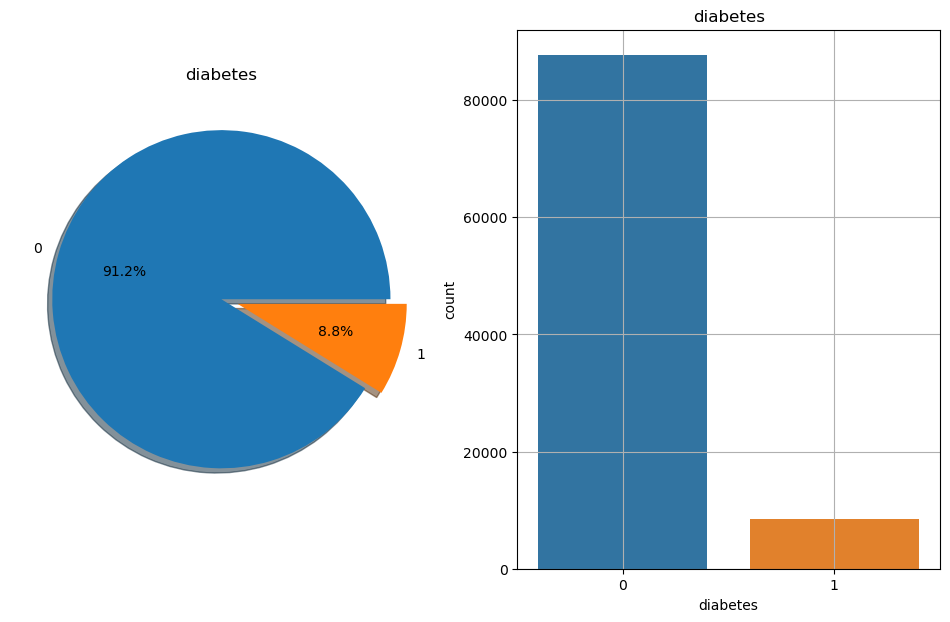

In [16]:
#Count plot 
#1 represents positive for diabetes and 0 represents negative for diabetes
#Data is not balanced, there are much more instances of non-diabetes
f,ax=plt.subplots(1,2,figsize=(12,7))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diabetes')
ax[0].set_ylabel('')
sns.countplot('diabetes',data=df,ax=ax[1])
ax[1].set_title('diabetes')
N,P = df['diabetes'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()

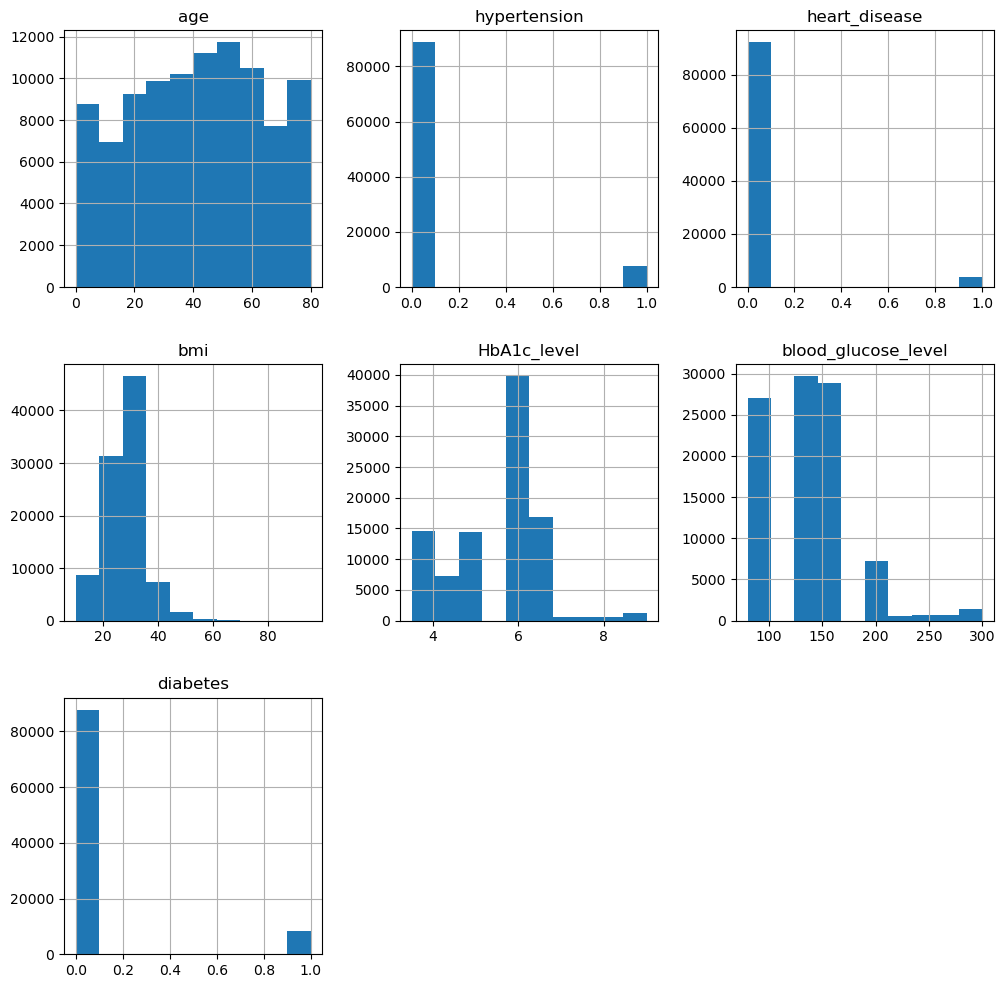

In [17]:
#Histogram
#Checking how data is distributed
df.hist(bins=10,figsize=(12,12))
plt.show()

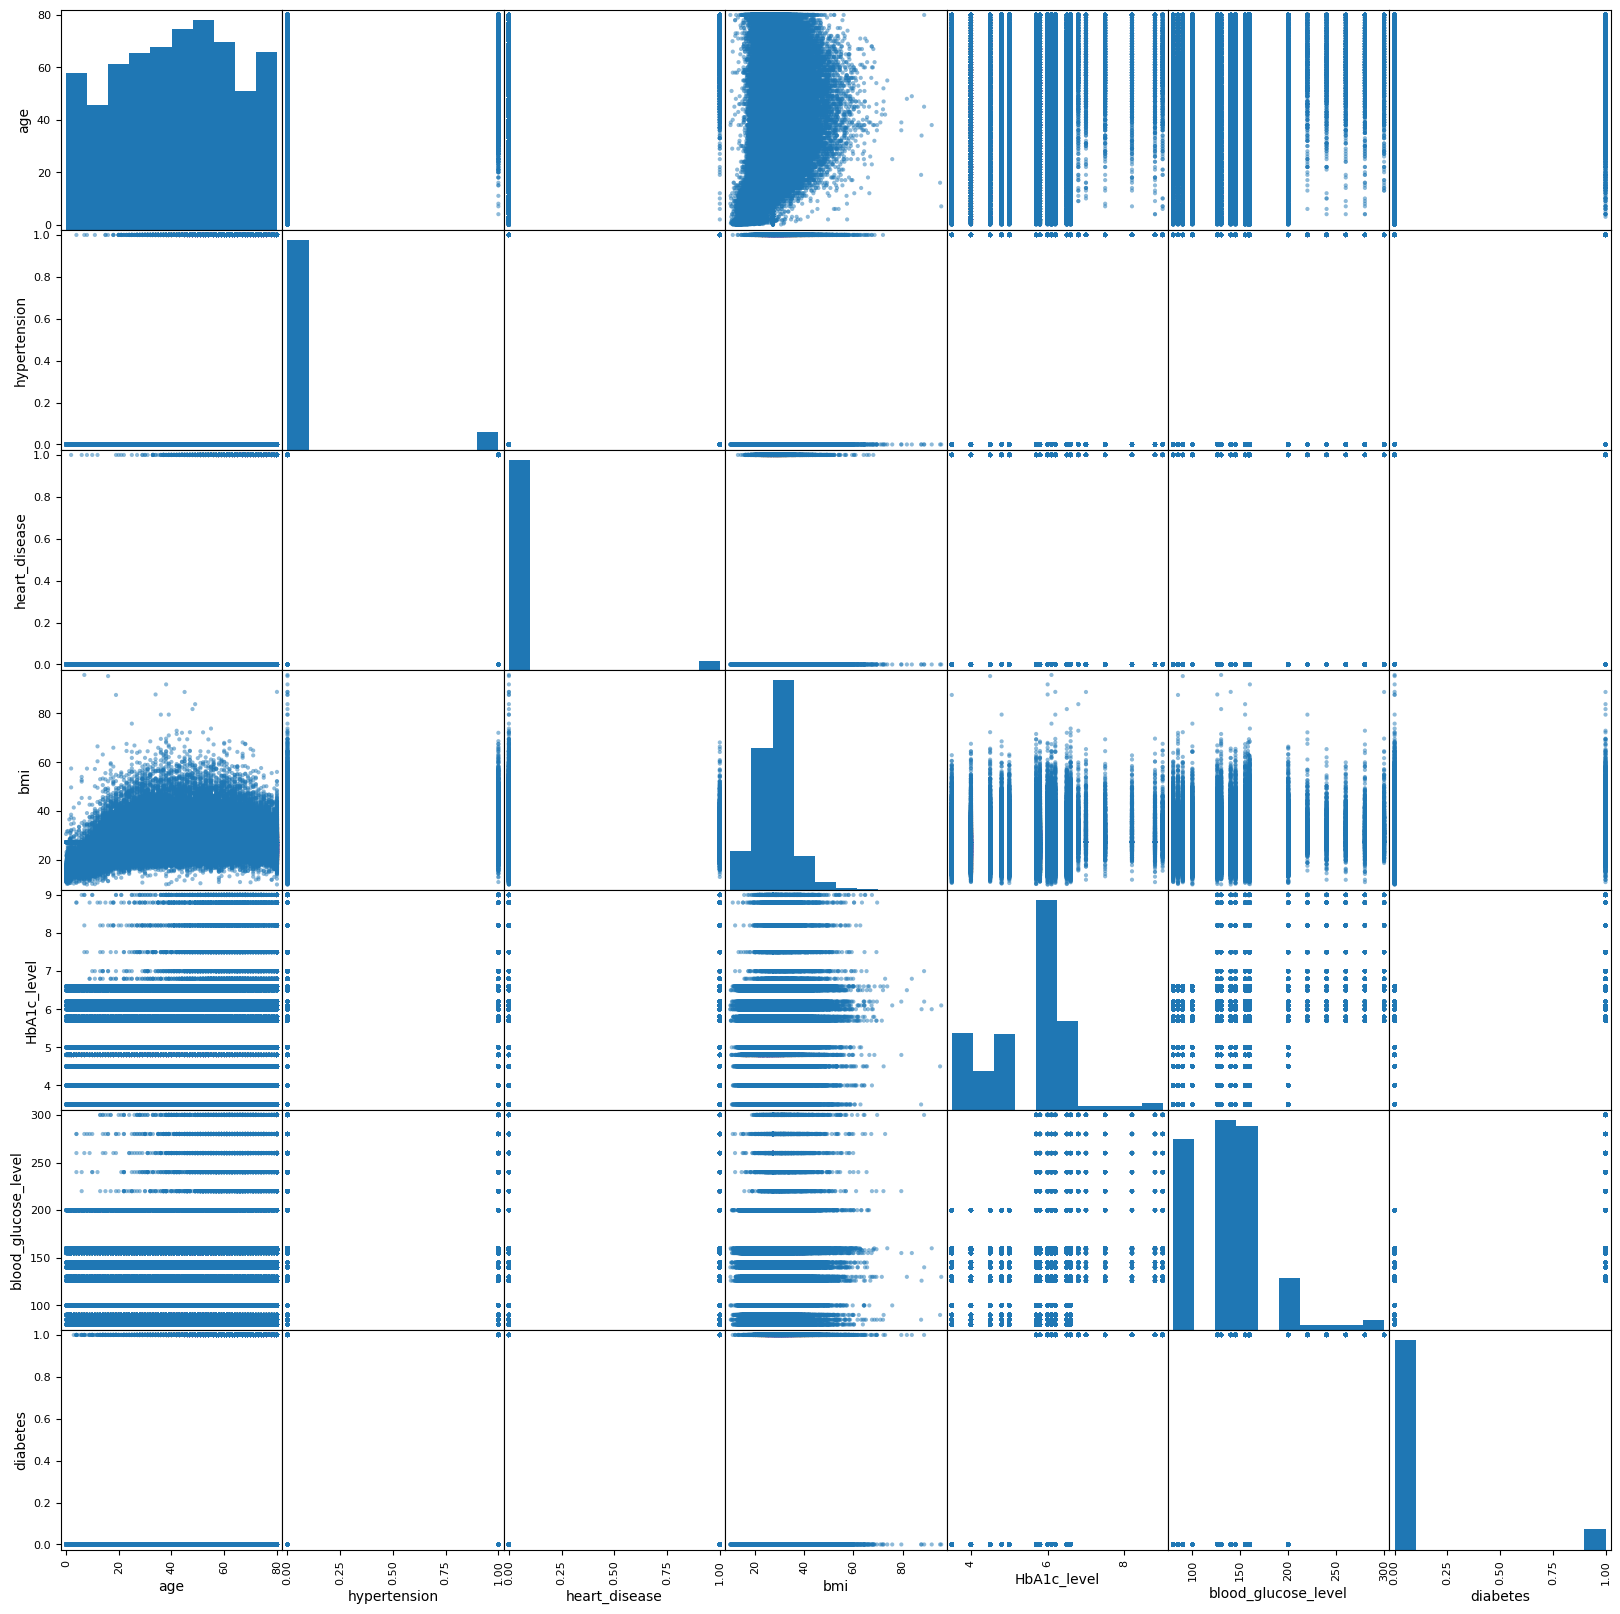

In [18]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

In [19]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [20]:
y = df["diabetes"]
X = df.drop(["diabetes","gender","smoking_history"], axis=1)

In [21]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [23]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [24]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [25]:
X_train.shape,y_train.shape

((76916, 6), (76916,))

In [26]:
X_test.shape,y_test.shape

((19230, 6), (19230,))

In [27]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
#SVM
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [31]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [33]:
X_test.shape

(19230, 6)

In [34]:
#Logistic regression prediction on test dataset
lr_pred=lr.predict(X_test)

In [35]:
lr_pred.shape

(19230,)

In [36]:
#KNN prediction on test dataset
knn_pred=knn.predict(X_test)

In [37]:
knn_pred.shape

(19230,)

In [38]:
#Naive Bayes prediction on test dataset
nb_pred=nb.predict(X_test)

In [39]:
#SVM prediction on test dataset
sv_pred=sv.predict(X_test)

In [40]:
#Decision Tree prediction on test dataset
dt_pred=dt.predict(X_test)

In [41]:
#Random Forest prediction on test dataset
rf_pred=rf.predict(X_test)

In [42]:
#Model Evaluation
#Train and test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression",lr.score(X_train,y_train)*100)
print("Accuracy test score of Logistic Regression",lr.score(X_test, y_test)*100)
print("Accuracy score of Logistic Regression",accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression 95.88642155078267
Accuracy test score of Logistic Regression 95.80863234529382
Accuracy score of Logistic Regression 95.80863234529382


In [43]:
#Train and test score of KNN
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Accuracy test score of KNN",knn.score(X_test, y_test)*100)
print("Accuracy score of KNN",accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 97.14233709501275
Accuracy test score of KNN 96.29745189807592
Accuracy score of KNN 96.29745189807592


In [44]:
#Train and test score of Naive Bayes
print("Train Accuracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Accuracy test score of Naive Bayes",nb.score(X_test, y_test)*100)
print("Accuracy score of Naive Bayes",accuracy_score(y_test, nb_pred)*100)

Train Accuracy of Naive Bayes 90.31410889801862
Accuracy test score of Naive Bayes 90.15080603224129
Accuracy score of Naive Bayes 90.15080603224129


In [45]:
#Train and test score of SVM
print("Train Accuracy of SVM",sv.score(X_train,y_train)*100)
print("Accuracy test score of SVM",sv.score(X_test, y_test)*100)
print("Accuracy score of SVM",accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 96.43507202662644
Accuracy test score of SVM 96.25065002600104
Accuracy score of SVM 96.25065002600104


In [46]:
#Train and test score of Decision Tree
print("Train Accuracy of Decision Tree",dt.score(X_train,y_train)*100)
print("Accuracy test score of Decision Tree",dt.score(X_test, y_test)*100)
print("Accuracy score of Decision Tree",accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decision Tree 99.72307452285611
Accuracy test score of Decision Tree 95.05980239209568
Accuracy score of Decision Tree 95.05980239209568


In [47]:
#Train and test score of Random Forest
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy test score of Random Forest",rf.score(X_test, y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 99.7217744032451
Accuracy test score of Random Forest 96.70306812272491
Accuracy score of Random Forest 96.70306812272491


In [48]:
#Confusion matrix of Naive Bayes
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,nb_pred)
cm

array([[16226,  1281],
       [  613,  1110]], dtype=int64)

<AxesSubplot:>

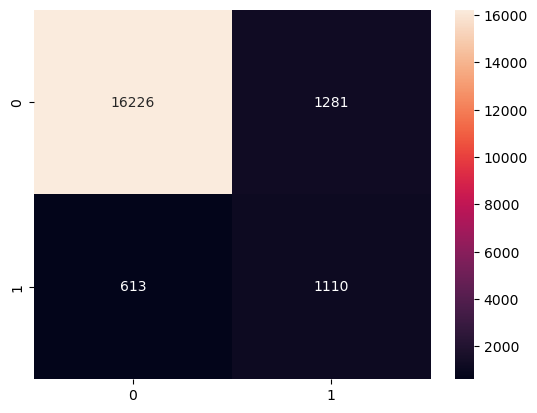

In [49]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt="d")

In [50]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [51]:
TN, FP, FN, TP

(16226, 1281, 613, 1110)

In [52]:
#Naive Bayes Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 16226
FP - False Positive 1281
FN - False Negative 613
TP - True Positive 1110
Accuracy Rate: 90.15080603224129
Misclassification Rate: 9.84919396775871


In [53]:
90.15080603224129+9.84919396775871

100.0

In [54]:
pd.crosstab(y_test, nb_pred, margins=False)

col_0,0,1
diabetes,,
0,16226,1281
1,613,1110


In [55]:
pd.crosstab(y_test, nb_pred, margins=True)

col_0,0,1,All
diabetes,,,
0,16226,1281,17507
1,613,1110,1723
All,16839,2391,19230


In [56]:
pd.crosstab(y_test, nb_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,16226,1281,17507
1,613,1110,1723
All,16839,2391,19230


In [57]:
#Precision
TP,FP

(1110, 1281)

In [58]:
Precision=TP/(TP+FP)
Precision

0.4642409033877039

In [59]:
1110/(1110+1281)

0.4642409033877039

In [60]:
#Precision score
precision_Score = TP / float(TP + FP)*100
print('Precision score : {0:0.4f}'.format(precision_Score))

Precision score : 46.4241


In [61]:
print('Classification Report of Naive Bayes: \n',classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.9636    0.9268    0.9449     17507
           1     0.4642    0.6442    0.5396      1723

    accuracy                         0.9015     19230
   macro avg     0.7139    0.7855    0.7422     19230
weighted avg     0.9189    0.9015    0.9085     19230



In [62]:
recall_score = TP / float(TP + FN)*100
print('recall_score',recall_score)

recall_score 64.42251886244922


In [63]:
TP,FN

(1110, 613)

In [64]:
1110/(1110+613)

0.6442251886244922

In [65]:
from sklearn.metrics import recall_score
print('Recall score: ',recall_score(y_test,nb_pred)*100)

Recall score:  64.42251886244922


In [66]:
print('Classification Report of Naive Bayes: \n,',classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
,               precision    recall  f1-score   support

           0     0.9636    0.9268    0.9449     17507
           1     0.4642    0.6442    0.5396      1723

    accuracy                         0.9015     19230
   macro avg     0.7139    0.7855    0.7422     19230
weighted avg     0.9189    0.9015    0.9085     19230



In [67]:
FPR = FP / float(FP + TN)*100
print('False Positive Rate : {0:0.4f}'.format(FPR))

False Positive Rate : 7.3171


In [68]:
FP,TN

(1281, 16226)

In [69]:
1281/(1281+16226)

0.07317073170731707

In [70]:
#Specificity
specificity = TN / (TN + FP)*100
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 92.6829


In [71]:
from sklearn.metrics import classification_report
print('Classification Report of Naive Bayes: \n', classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.9636    0.9268    0.9449     17507
           1     0.4642    0.6442    0.5396      1723

    accuracy                         0.9015     19230
   macro avg     0.7139    0.7855    0.7422     19230
weighted avg     0.9189    0.9015    0.9085     19230



In [72]:
#ROC curve and AUC
auc = roc_auc_score(y_test, nb_pred)
print("ROC AUC SCORE of Naive Bayes is",auc)

ROC AUC SCORE of Naive Bayes is 0.7855272284585875


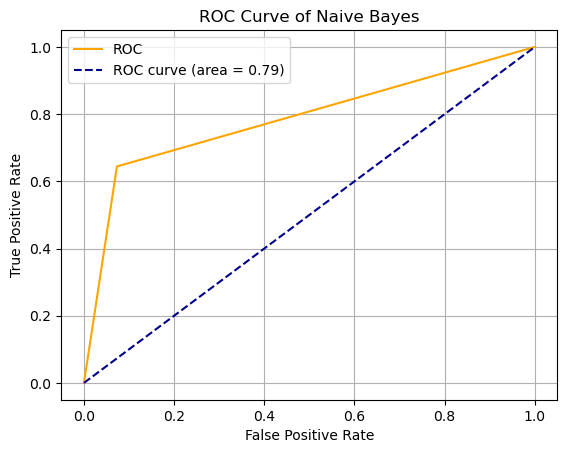

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.legend()
plt.grid()
plt.show()